# < Deep Learning - PART2 TF2 CNNs >

# Ch 5. CNNs Workshop 4 - CIFAR10 : Image Classifier on Google Colab & Google Drive 
2021/10/01

**[ Reference ] :**
+ TensorFlow Core - Tutorials: **Convolutional Neural Network (CNN)** https://www.tensorflow.org/tutorials/images/cnn?hl=zh_tw
+ **CIFAR-10 and CIFAR-100 datasets** https://www.cs.toronto.edu/~kriz/cifar.html
+ 李飛飛教授：Convolutional Neural Networks (教學投影片)
  (http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf)
+ 李飛飛教授：Convolutional Neural Networks (CNNs / ConvNets)
  (https://cs231n.github.io/convolutional-networks/)
+ `tf.keras.layers.Conv2D`
  (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
  
----

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import layers, models

2.3.0


### Download CIFAR-10 Python Version dataset from 
+ #### https://www.cs.toronto.edu/~kriz/cifar.html
+ The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

> #### [ Reference ] :  
 + `Learning Multiple Layers of Features from Tiny Images`, Alex Krizhevsky, 2009.
https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

In [ ]:
import numpy as np

class CifarLoader(object):
    def __init__(self, source_files):
        self._source = source_files
        self._i = 0
        self.images = None
        self.labels = None
    
    def load(self):
        data = [unpickle(f) for f in self._source]
        # print(data)
        images = np.vstack([d[b"data"] for d in data])
        n = len(images)  # 32 x 32 x 3 channels
        self.images = images.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1).astype(float) / 255
        self.labels = one_hot(np.hstack([d[b"labels"] for d in data]), 10)
        return self

    def next_batch(self, batch_size):
        x, y = self.images[self._i : self._i+batch_size], self.labels[self._i:self._i+batch_size]
        self._i = (self._i + batch_size) % len(self.images)
        return x, y

## Loading dataset and running this program on the Google's Colab... 

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

##  Go to this URL in a browser: https://accounts.google.com/o/oauth2/......
##  Enter your authorization code:
##   ··········
##  Mounted at /content/drive

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py"
##  Loading CIFAR-10 dataset from your Google Drive
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py"

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


### Loading dataset from the unzipped files...

In [ ]:
import pickle
import os

##  Loading CIFAR-10 dataset from your Google Drive
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py"

##  < for CIFAR-10 dataset on local host >
##  DATA_PATH = "./cifar-10-batches-py"

def unpickle(file):
    with open(os.path.join(DATA_PATH, file), 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')   ##  encoding='bytes'
    return dict

def one_hot(vec, vals=10):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [ ]:
class CifarDataManager(object):
    def __init__(self):
        self.train = CifarLoader(["data_batch_{}".format(i)
                                   for i in range(1, 6)]).load()
        self.test = CifarLoader(["test_batch"]).load()

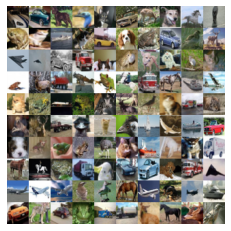

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def display_cifar(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)])
         for i in range(size)])
    plt.imshow(im)
    plt.show()
    
cifar = CifarDataManager()  # Loading CIFAR-10 dataset
images = cifar.train.images
display_cifar(images, 10)

In [ ]:
print("Number of train images: {}".format(len(cifar.train.images)))
print("Number of train labels: {}".format(len(cifar.train.labels)))
print("Number of test images: {}".format(len(cifar.test.images)))
print("Number of test images: {}".format(len(cifar.test.labels)))

Number of train images: 50000
Number of train labels: 50000
Number of test images: 10000
Number of test images: 10000


In [ ]:
print("Train images: {}".format(cifar.train.images.shape))
print("Train labels: {}".format(cifar.train.labels.shape))
print(" Test images: {}".format(cifar.test.images.shape))
print(" Test labels: {}".format(cifar.test.labels.shape))

Train images: (50000, 32, 32, 3)
Train labels: (50000, 10)
 Test images: (10000, 32, 32, 3)
 Test labels: (10000, 10)


--------------------------------------

## < CNN Model > : 

--------------------------------------

+ ### Forward Propagation

In [200]:
model = models.Sequential()

# 1st (Conv Layer + Batch Norm) * 3 + MaxPooling Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
            padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# 2nd (Conv Layer + Batch Norm) * 2 + MaxPooling Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# 3rd (Conv Layer + Batch Norm) * 2 + MaxPooling Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

# 4th (Conv Layer + Batch Norm) * 2 
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

In [201]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())     # Batch Norm
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

In [202]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_245 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_280 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_246 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_281 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_247 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_282 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 16, 16, 64)      

+ ### Back-Propagation

In [203]:
model.compile(optimizer='adam',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

### Training ...

+ **`BATCH_SIZE = 32 (default value : 32)`**

In [204]:
history = model.fit(cifar.train.images, cifar.train.labels, epochs=30, 
           validation_split=0.1)

Epoch 1/30
1407/1407 [==============================] - 36s 26ms/step - loss: 1.6297 - accuracy: 0.4180 - val_loss: 1.1772 - val_accuracy: 0.5842
Epoch 2/30
1407/1407 [==============================] - 36s 26ms/step - loss: 1.0685 - accuracy: 0.6246 - val_loss: 0.9373 - val_accuracy: 0.6838
Epoch 3/30
1407/1407 [==============================] - 36s 25ms/step - loss: 0.8717 - accuracy: 0.6985 - val_loss: 0.7267 - val_accuracy: 0.7464
Epoch 4/30
1407/1407 [==============================] - 36s 25ms/step - loss: 0.7530 - accuracy: 0.7415 - val_loss: 0.7063 - val_accuracy: 0.7534
Epoch 5/30
1407/1407 [==============================] - 36s 25ms/step - loss: 0.6714 - accuracy: 0.7692 - val_loss: 0.6229 - val_accuracy: 0.7980
Epoch 6/30
1407/1407 [==============================] - 36s 25ms/step - loss: 0.6237 - accuracy: 0.7879 - val_loss: 0.6122 - val_accuracy: 0.7910
Epoch 7/30
1407/1407 [==============================] - 36s 25ms/step - loss: 0.5640 - accuracy: 0.8100 - val_loss: 0.5447 -

### Evaluation

In [205]:
test_loss, test_acc = model.evaluate(x=cifar.test.images, y=cifar.test.labels)
test_loss, test_acc

313/313 [==============================] - 3s 9ms/step - loss: 0.4396 - accuracy: 0.8725


(0.4396136701107025, 0.8725000023841858)

In [206]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

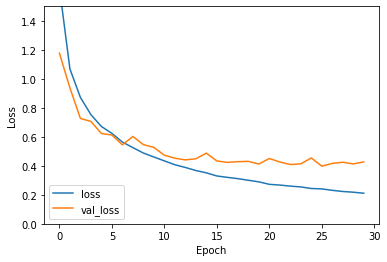

In [211]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.5])
plt.legend(loc='lower left')
plt.show()

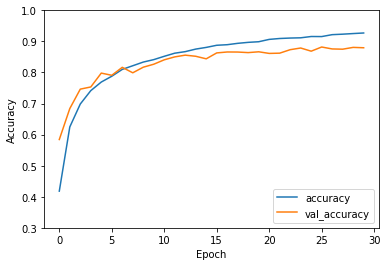

In [212]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')
plt.show()

### Confusion Matrix

In [213]:
test_predict = model.predict(cifar.test.images)
test_predict

array([[1.4182602e-07, 6.2875465e-08, 1.6014928e-06, ..., 1.2519469e-07,
        8.0835086e-08, 4.2166075e-08],
       [1.9468818e-05, 1.6829812e-03, 4.2885876e-08, ..., 8.3645615e-09,
        9.9829668e-01, 1.8060865e-07],
       [2.0425217e-04, 9.9261886e-01, 8.2219703e-06, ..., 1.9275510e-06,
        7.1251350e-03, 3.2941814e-05],
       ...,
       [1.0717752e-06, 7.5279139e-08, 4.6543805e-06, ..., 1.4168293e-06,
        3.6145357e-07, 2.2929487e-07],
       [8.8150543e-04, 9.9872953e-01, 1.4206319e-04, ..., 9.5543355e-06,
        5.1114512e-05, 4.8709891e-05],
       [2.7192047e-07, 1.7739443e-06, 4.2710103e-06, ..., 9.9982053e-01,
        1.7729168e-07, 1.5285700e-07]], dtype=float32)

In [214]:
import numpy as np
test_predict_result = np.array([np.argmax(test_predict[i]) for i in range(len(test_predict))])
test_predict_result

array([3, 8, 1, ..., 5, 1, 7])

In [215]:
test_labels = np.array([np.argmax(cifar.test.labels[i]) 
             for i in range(len(cifar.test.labels))])
test_labels

array([3, 8, 8, ..., 5, 1, 7])

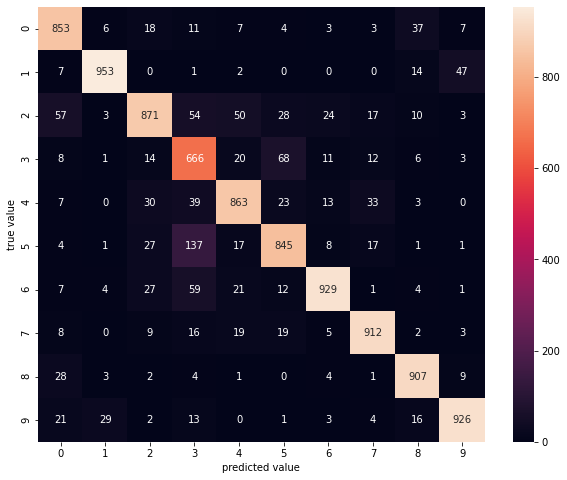

[[853   6  18  11   7   4   3   3  37   7]
 [  7 953   0   1   2   0   0   0  14  47]
 [ 57   3 871  54  50  28  24  17  10   3]
 [  8   1  14 666  20  68  11  12   6   3]
 [  7   0  30  39 863  23  13  33   3   0]
 [  4   1  27 137  17 845   8  17   1   1]
 [  7   4  27  59  21  12 929   1   4   1]
 [  8   0   9  16  19  19   5 912   2   3]
 [ 28   3   2   4   1   0   4   1 907   9]
 [ 21  29   2  13   0   1   3   4  16 926]]


In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_predict_result, test_labels)

plt.figure(figsize=(10,8))
sns.heatmap(mat, square=False, annot=True, fmt ='d', cbar=True)
plt.xlim((0, 10))
plt.ylim((10, 0))
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

print(mat)